## 多项式回归过拟合的情况

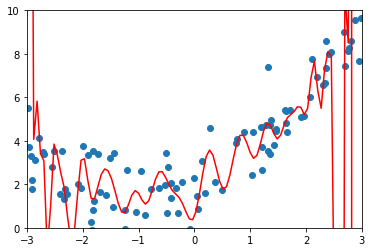

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def PolynomiaRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scale', StandardScaler()),
        ('lin_reg', LinearRegression()),
    ])

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

poly100_reg = PolynomiaRegression(degree=100)
poly100_reg.fit(X, y)
y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)
# 0.687293250556113
x_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(x_plot)

plt.scatter(x, y)
plt.plot(x_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

解决过拟合的一个方法--正则化

# 模型正则化

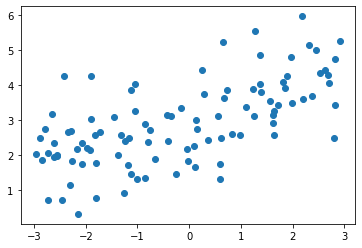

In [2]:
# 测试用例
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

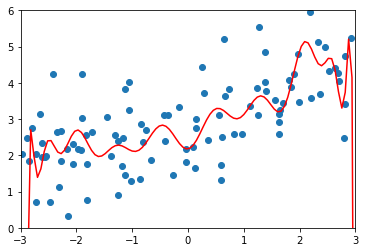

In [3]:
# 一个过拟合情况
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def PolynomiaRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scale', StandardScaler()),
        ('lin_reg', LinearRegression()),
    ])


np.random.seed(666)
x_train, x_test, y_train, y_test = train_test_split(X, y)

poly_reg = PolynomiaRegression(degree=20)
poly_reg.fit(x_train, y_train)

y_poly_predict = poly_reg.predict(x_test)
mean_squared_error(y_test, y_poly_predict)
# 167.9401085999025
import matplotlib.pyplot as plt
x_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(x_plot)

plt.scatter(x, y)
plt.plot(x_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

In [4]:
# 把画图操作封装成函数，方便后面调用
def plot_model(model):
    x_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(x_plot)

    plt.scatter(x, y)
    plt.plot(x_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

## 岭回归（Ridege Regression）

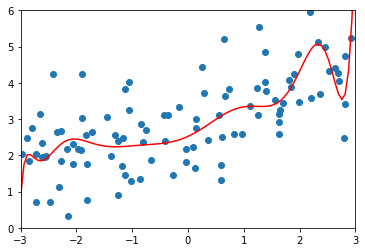

In [5]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scale', StandardScaler()),
        ('lin_reg', Ridge(alpha=alpha)),
    ])

ridege1_reg = RidgeRegression(20, alpha=0.0001)
ridege1_reg.fit(x_train, y_train)

y1_predict = ridege1_reg.predict(x_test)
mean_squared_error(y_test, y1_predict)
# 1.3233492754136291
# 跟之前的136.相比小了很多
plot_model(ridege1_reg)

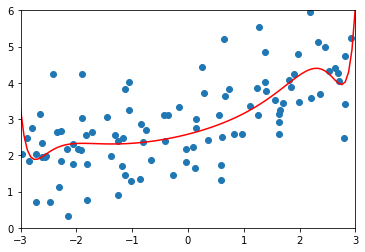

In [6]:
# 调整 a
ridege2_reg = RidgeRegression(20, alpha=1)
ridege2_reg.fit(x_train, y_train)

y2_predict = ridege2_reg.predict(x_test)
mean_squared_error(y_test, y2_predict)
# 1.1888759304218461
plot_model(ridege2_reg)

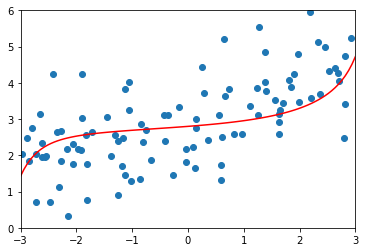

In [7]:
ridege3_reg = RidgeRegression(20, alpha=100)
ridege3_reg.fit(x_train, y_train)

y3_predict = ridege3_reg.predict(x_test)
mean_squared_error(y_test, y3_predict)
# 1.3196456113086197
# 此时相比alpha=1时均方误差上升了，说明可能正则过头了
plot_model(ridege3_reg)

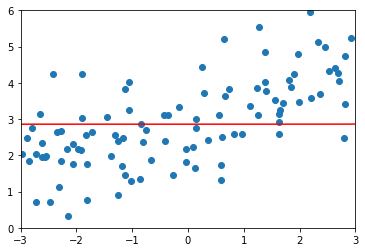

In [8]:
ridege4_reg = RidgeRegression(20, alpha=1000000)
ridege4_reg.fit(x_train, y_train)

y4_predict = ridege4_reg.predict(x_test)
mean_squared_error(y_test, y4_predict)
# 1.8404103153255003
plot_model(ridege4_reg)

## LASSO Regularization

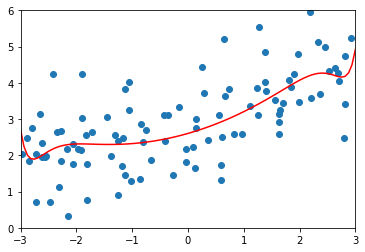

In [9]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scale', StandardScaler()),
        ('lin_reg', Lasso(alpha=alpha)),
    ])

lasso1_reg = LassoRegression(20, 0.01) 
#这里相比Ridge的alpha小了很多，这是因为在Ridge中是平方项
lasso1_reg.fit(x_train, y_train)

y1_predict = lasso1_reg.predict(x_test)
mean_squared_error(y_test, y1_predict)
# 1.149608084325997
plot_model(lasso1_reg)


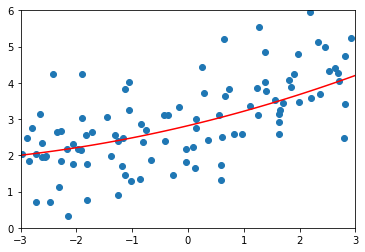

In [10]:
lasso2_reg = LassoRegression(20, 0.1) 
lasso2_reg.fit(x_train, y_train)

y2_predict = lasso2_reg.predict(x_test)
mean_squared_error(y_test, y2_predict)
# 1.1213911351818648
plot_model(lasso2_reg)

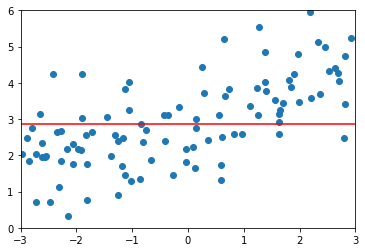

In [12]:
lasso3_reg = LassoRegression(20, 1) 
lasso3_reg.fit(x_train, y_train)

y3_predict = lasso3_reg.predict(x_test)
mean_squared_error(y_test, y3_predict)
# 1.8408939659515595
plot_model(lasso3_reg)